<a href="https://colab.research.google.com/github/rlawogjs96/deeplearningnlp_starters/blob/main/MultiLayer_Perceptron_(MLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### MultiLayer Perceptron, MLP

다층 퍼셉트론은 Feed Forward Neural Network (FFNN)의 가장 기본적인 형태이다. 입력층에서 출력층으로 오직 한 방향으로만 연산 방향이 정해져 있는 신경망을 말한다. 

#### 1. Keras texts_to_matrix()

In [2]:
# Keras의 전처리 도구인 Tokenizer Import
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

텍스트 데이터에 대해 정수 인코딩을 수행

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


텍스트 데이터에 texts_to_matrix()를 사용한다. 입력된 텍스트 데이터로부터 행렬을 만드는 도구이다. binary, count, freq, tfidf 사용

In [5]:
# texts_to_matrix의 입력으로 texts를 넣고, 모드는 count로 지정
print(tokenizer.texts_to_matrix(texts, mode = 'count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


Count를 사용함으로서 앞서 배운 문서 단어 행렬을 생성. 인덱스는 word_index의 결과가 된다. 

행렬의 인덱스는 0부터 시작. 

In [6]:
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [8]:
# 둘째자리까지 반올림한 출력
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2))

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [9]:
# 각 단어의 등장 횟수를 분자로 각 문서의 크기를 분모로 하는 표현 방법. 
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2))

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


#### 2. Twenty Newsgroups Data

In [10]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

scikit-learn contains 18,846 newsgroups email data with 20 different topics.

In [11]:
# returns only training data if subset = 'train' is set
newsdata = fetch_20newsgroups(subset = 'train')

In [12]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


data, filenames, target_names, target, DESCR, description 이라는 6개 속성이 존재한다.

In [13]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [14]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


Using Test Data, Looking at the email itself, the objective is to guess what the topic is out of the 20 listed topics. 

In [15]:
print('7번 레이블이 의미하는 주제: {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제: rec.autos


In [16]:
# 첫번째 샘플 출력 
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [17]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


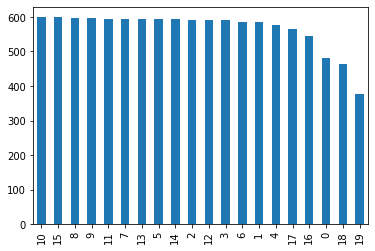

In [19]:
data['target'].value_counts().plot(kind='bar');

In [20]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


subset에 'test'를 기재하면 테스트 데이터를 불러오고, 훈련 데이터와 테스트 데이터의 본문과 레이블을 각각 저장.

In [21]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [22]:
max_words = 10000
num_classes = 20

In [23]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    tokenizer = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word

In [24]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [25]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [26]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


불용어에 해당되는 단어 'the'가 가장 빈도수가 높다.

#### 3. MLP를 사용하여 텍스트 분류

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [28]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [29]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 4s 9ms/step - loss: 2.2613 - accuracy: 0.3446 - val_loss: 0.9445 - val_accuracy: 0.8322
Epoch 2/5
80/80 [==============================] - 1s 7ms/step - loss: 0.8574 - accuracy: 0.7701 - val_loss: 0.4587 - val_accuracy: 0.8852
Epoch 3/5
80/80 [==============================] - 1s 6ms/step - loss: 0.4209 - accuracy: 0.8896 - val_loss: 0.3443 - val_accuracy: 0.8966
Epoch 4/5
80/80 [==============================] - 1s 7ms/step - loss: 0.2598 - accuracy: 0.9320 - val_loss: 0.3014 - val_accuracy: 0.9090
Epoch 5/5
80/80 [==============================] - 0s 6ms/step - loss: 0.1729 - accuracy: 0.9581 - val_loss: 0.2879 - val_accuracy: 0.9117
binary 모드의 테스트 정확도: 0.830987811088562
Epoch 1/5
80/80 [==============================] - 1s 8ms/step - loss: 2.7222 - accuracy: 0.2431 - val_loss: 1.5793 - val_accuracy: 0.7403
Epoch 2/5
80/80 [==============================] - 1s 6ms/step - loss: 1.4186 - accuracy: 0.6228 - val_loss: 0.7518 - val_accura